# Project: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Science/Foodhub Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


The DataFrame has **9** columns as mentioned in the Data Dictionary. Data in each row corresponds to one order placed by a customer.

###  How many rows and columns are present in the data? 

In [4]:
# shape returns the no of rows and columns present in the dataframe. shape[0] represents row no and shape[1] represents column no

print("There are",df.shape[0],"rows and", df.shape[1],"columns in the dataset")

There are 1898 rows and 9 columns in the dataset


There are **1898** rows and **9** columns in the dataset


### What are the datatypes of the different columns in the dataset? 

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


##### Observations: 

#### 1) There are 3 datatypes in the different columns of the dataset: integer, float and string

#### 2) Four columns are integers: order_id, customer_id, food_preparation time and delivery_time 

#### 3) One column is float: cost_of_the_order

#### 4) Four columns are string: restaurant_name, cuisine_type, day_of_the_week and rating


### Are there any missing values in the data? 

In [6]:
# Check if there are missing values in the dataset

df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in any of the columns as seen above. 


###  Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
# describe() gives a statistical summary of the data
# Included all datatypes(include='all' in parantheses) so that categorical variables are also displayed 
# Dataframe is transposed to see things better visually


df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


### Observations: 

 1) The minimum time it takes to prepare food is **20 minutes**

 2) The average time it takes to prepare food is **27.4 minutes** approximately

 3) The maximum time it takes to prepare food is **35 minutes**

### Other observations: 

 1) There are **178** unique restaurants from which customers place orders 
 
 2) **Shake Shack** is the most popular restaurant and **American** is the most popular cuisine
 
 3) **Weekend** is the most popular days to place an order
 
 4) There are **four** unique types of ratings given by customers




### How many orders are not rated? 

In [8]:
# First it is good to check what are the different kinds of unique ratings given by customers

df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### We find there are four unique ratings: 3, 4, 5 or Not given

In [9]:
# Next we can calculate in what frequency each of these ratings are given. This will give us the no of orders not rated aka 'Not given' rating

df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [10]:
# We can also check what percentages each type of rating have

df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations: **736** orders have not been rated by the customers which makes up **~39%** of all orders placed

###                                                                           

###                                                                            

## Exploratory Data Analysis (EDA)

## Univariate Analysis

### Explore all the variables and provide observations on their distributions. 

## Categorical Variables

### **Restaurant Name**

In [11]:
# No of unique restaurants that customers have ordered from this app

df['restaurant_name'].nunique()

178

#### There are **178** unique restaurants from which customers have ordered food

### **Cuisine Type**

In [12]:
# Names of unique cuisine types that customers have ordered from this app

df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [13]:
# No of unique cuisine types that customers have ordered from this app

df['cuisine_type'].nunique()

14

In [14]:
# Percentages of cuisine types that customers order from this app

df['cuisine_type'].value_counts(normalize = True)

American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: cuisine_type, dtype: float64

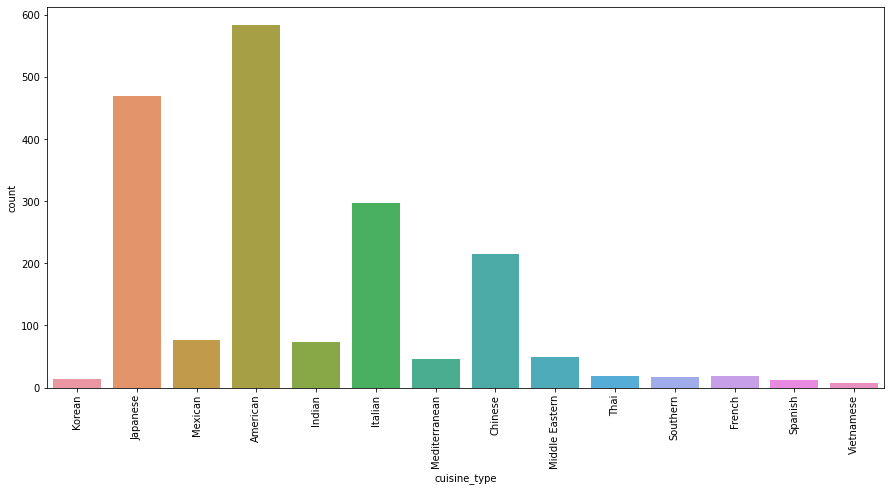

In [15]:
# Barplot showing the distribution of customer orders for different cuisine types
plt.figure(figsize = (15,7))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90);


### Observations:

#### 1) There are 14 different types of cuisine ordered by customers

#### 2) American cuisine is the most popular type of cuisine, making up 30% of all customer orders

#### 3) Japanese cuisine is 2nd most popular, followed by Italian and Chinese respectively

#### 4) Top 4 popular cuisine types make up 83% of all orders

### **Day of the Week**

In [16]:
# No of unique values for day of the week

df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

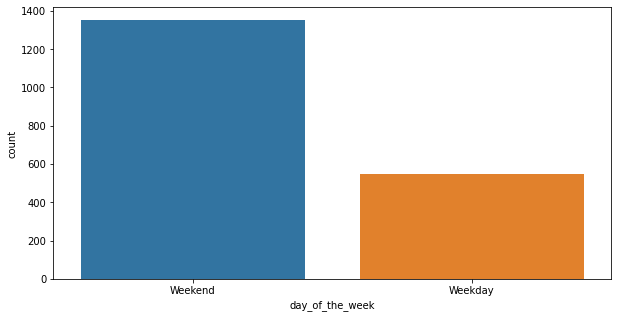

In [17]:
# Barplot showing customer order distribution on weekdays vs weekends

plt.figure(figsize = (10,5))
sns.countplot(data=df,x='day_of_the_week');


### Observations:

#### 1) There are two categories in week_of_the_day: Weekday and Weekend

#### 2) Weekends are more popular to order food compared to weekdays

#### 3) Customers have ordered ~2.5 times more on weekends compared to weekdays

### **Rating**

In [18]:
# No of unique customer ratings 

df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [19]:
# Percentages of each types of rating

df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [20]:
# Create a list to have the ratings arranged in ascending order

rating_list=['3','4','5','Not given']

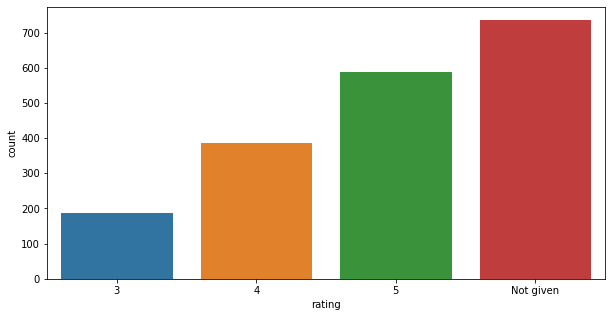

In [21]:
# Barplot showing the distribution of ratings for different customer orders

plt.figure(figsize = (10,5))
sns.countplot(data=df,x='rating',order=rating_list);


### Observations:

#### 1) There are four unique ratings: 3, 4, 5 and Not given
#### 2) It is most common to not give a rating that makes up ~39% of all orders

#### 3) Ratings 5, 4 and 3 are given nearly 31%, 20% and 10% respectively

## Numerical Variables

### **Order ID**

In [22]:
# Check how many unique orders have been placed through this app

df['order_id'].nunique()

1898

### **Customer ID**

In [23]:
# Check how many unique customers have been placed orders through this app

df['customer_id'].nunique()

1200

#### There are **1200** unique customers who have placed **1898** orders through the app

### **Cost of the Order**

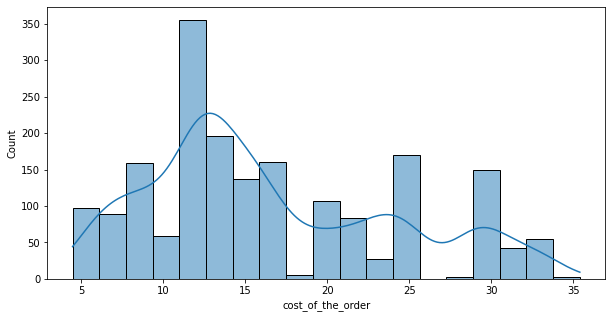

In [24]:
# Histogram showing the distribution of cost of orders 

plt.figure(figsize = (10,5))
sns.histplot(data=df,x='cost_of_the_order',kde=True);

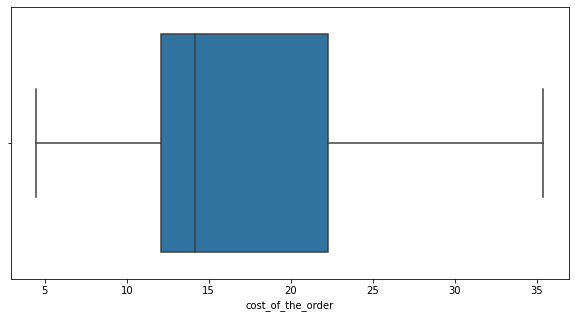

In [25]:
# Box-plot showing the distribution of cost of orders 
plt.figure(figsize = (10,5))
sns.boxplot(data=df,x='cost_of_the_order');

### Observations:

#### 1) Orders range from 5 to 35 dollars
#### 2) Median order price is $14
#### 3) Distribution is right skewed with a number of orders above the median price


### **Food Preparation Time**

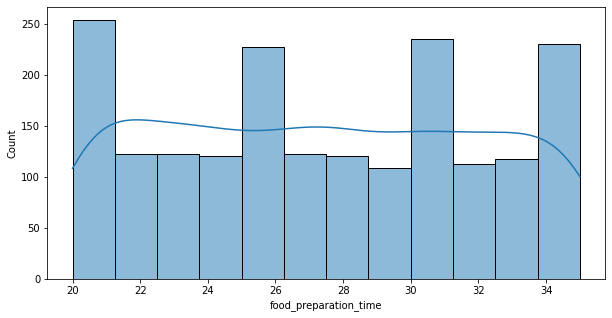

In [26]:
# Histogram showing the distribution of food preparation time
plt.figure(figsize = (10,5))
sns.histplot(data=df,x='food_preparation_time',kde=True);

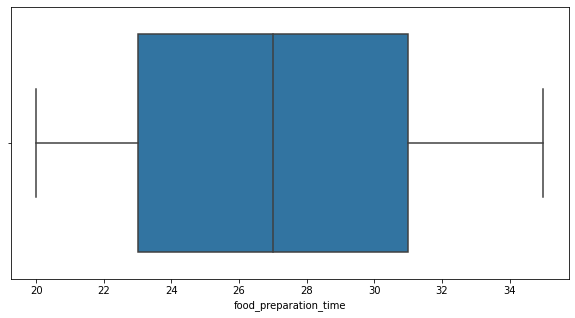

In [27]:
# Boxplot showing the distribution of food preparation time 
plt.figure(figsize = (10,5))
sns.boxplot(data=df,x='food_preparation_time');

### Observations:

#### 1) Orders take 20 to 35 minutes to prepare
#### 2) Median time to prepare food is around 27 minutes
#### 3) Distribution looks normally distributed


### **Delivery Time**

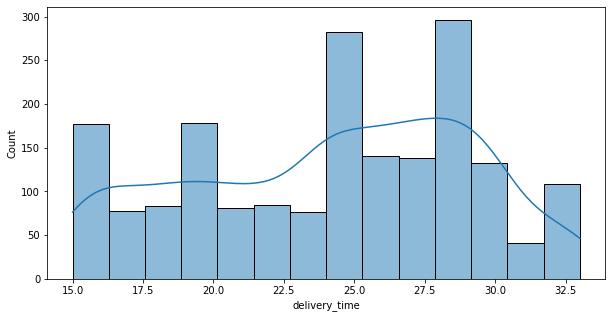

In [28]:
# Histogram showing the distribution of delivery time
plt.figure(figsize = (10,5))
sns.histplot(data=df,x='delivery_time',kde=True);

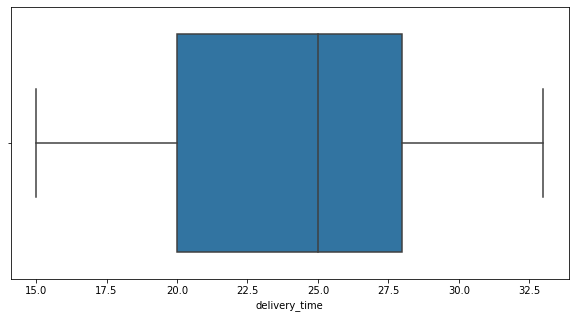

In [29]:
# Boxplot showing the distribution of delivery time
plt.figure(figsize = (10,5))
sns.boxplot(data=df,x='delivery_time');

### Observations:

#### 1) Orders take 15 to 33 minutes to deliver
#### 2) Median delivery time is 25 minutes
#### 3) Distribution is slightly left skewed with a number of orders being delivered in less than the median delivery time


## KEY OBSERVATIONS

### (1) There are **178** unique restaurants from which customers have ordered 

### (2) There are 14 different types of cuisine ordered by customers of which **American cuisine** is the most popular type of cuisine

### (3) Weekends are more popular to order food compared to weekdays

### (4) Customers most commonly don't rate a order

### (5) There are **1200** unique customers who have used this app

### (6) Median cost of food is around **14 dollars**

### (7) It takes a median time of nearly **27 minutes** to prepare food and **25 minutes** to deliver food




### Which are the top 5 restaurants in terms of the number of orders received? 

In [30]:
# Top 5 restaurants by number of orders recieved

df['restaurant_name'].value_counts().head(5)



Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### Observations: 

#### The top 5 restaurants in terms of the number of orders received are 

#### 1) Shake Shack 2) The Meatball Shop 3) Blue Ribbon Sushi 4) Blue Ribbon Fried Chicken and 5) Parm


### Which is the most popular cuisine on weekends?

In [31]:
# Most popular cuisine on weekends

df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()


American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

### Observation: 

#### The most popular cuisine on weekends is **American** with 415 orders. Japanese cuisine is 2nd most popular on weekends with 335 orders


### What percentage of the orders cost more than 20 dollars? 

In [32]:
# Calculating percentage of orders that cost more than 20 dollars

# First no of rows for orders costing>20 is calculated
cost20_plus=df.loc[df['cost_of_the_order']>20].shape[0]

# Next percentage of orders>20 is calculated and answer is rounded to 1 decimal 
percent_20_plus=round((cost20_plus/df.shape[0])*100,1)

print ("The percentage of orders that cost more than 20 dollars is",percent_20_plus)

The percentage of orders that cost more than 20 dollars is 29.2


### Observation: 

#### **29.2%** orders cost more than 20 dollars


###  What is the mean order delivery time?

In [33]:
# Mean delivery time is calcuated and rounded to 2 decimals

mean_dt= round(df['delivery_time'].mean(),2)

print ("The average order delivery time is", mean_dt, "minutes")

The average order delivery time is 24.16 minutes


### Observation

#### The mean order delivery time is 24.16 minutes


###  The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [34]:
# Three most frequent customers and their total no of orders placed through this app
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Observations: 
#### *Customer ID 52832* placed the most orders with **13** orders
#### *Customer ID 47440* placed the 2nd most orders with **10** orders
#### *Customer ID 83287* placed the 3rd most orders with **9** orders

#### They are all eligible for the 20% discount vouchers

## Multivariate Analysis

###  Perform a multivariate analysis to explore relationships between the important variables in the dataset. 


### Correlation among numerical variables

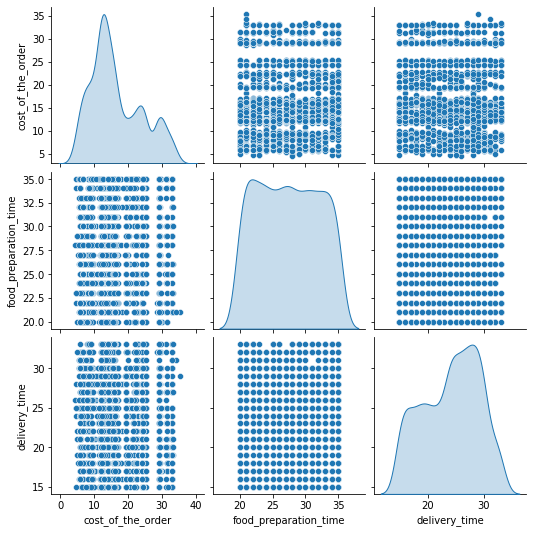

In [35]:
# Exploring the relationship between the numerical variables as scatter-plots. 
# Customer ID and Order ID are ignored as they should not correlate with anything


sns.pairplot(data=df, vars=['cost_of_the_order',"food_preparation_time", "delivery_time"], diag_kind='kde');

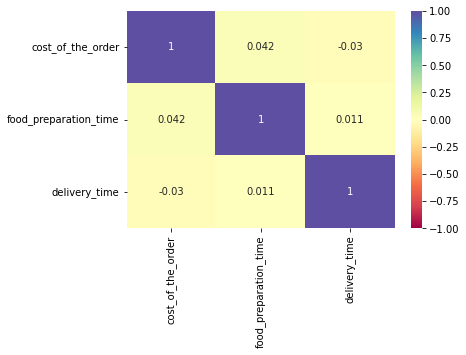

In [36]:
# Exploring the relationship between numerical variables as a heat-map

num_var = ['cost_of_the_order','food_preparation_time', 'delivery_time']

sns.heatmap(data=df[num_var].corr(),vmin=-1, vmax=1,annot=True,cmap='Spectral');

### Observation: There seems to be very poor correlations between cost of the order, food preparation time and food delivery time

### **Cuisine Type Vs Order cost**

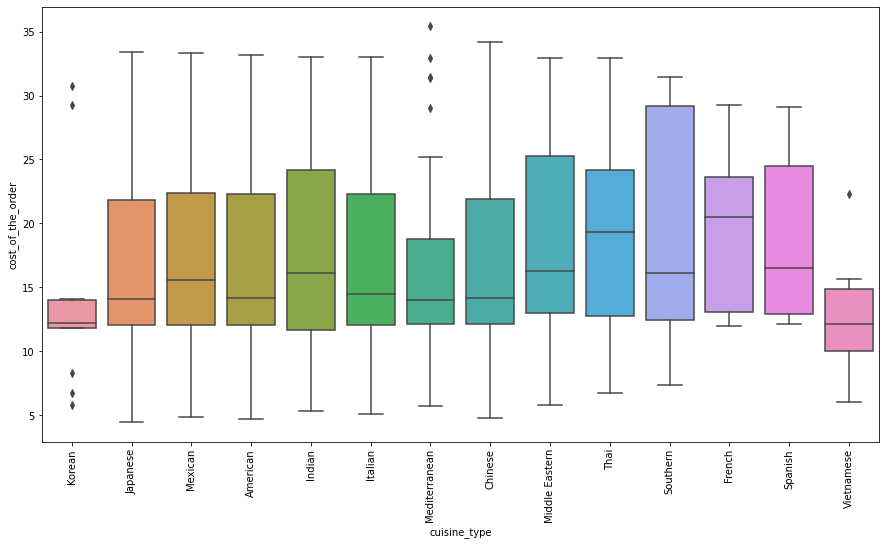

In [37]:
# Boxplot showing relationship between different cuisine types and cost of orders

plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);

### Observations

#### 1) Median price for most cuisines is between 14-16 dollars

#### 2) Most of the popular cuisines are on the cheaper side e.g. American, Japanese, Italian and Chinese foods have ~14 dollar median price and were the 4 most popular cuisine types

#### 3) Korean and Vietnamese foods tend to be cheaper than most cuisines

#### 4) Thai and French food seem to be more expensive than most cuisines

#### 5) Some Korean food orders were much cheaper (<10 dollars) and some were more expensive( 30 dollars) relative to most Korean orders

#### 6) Some Mediterranean food orders were expensive (30-35 dollars) relative to most orders

### **Cuisine type vs food preparation time**

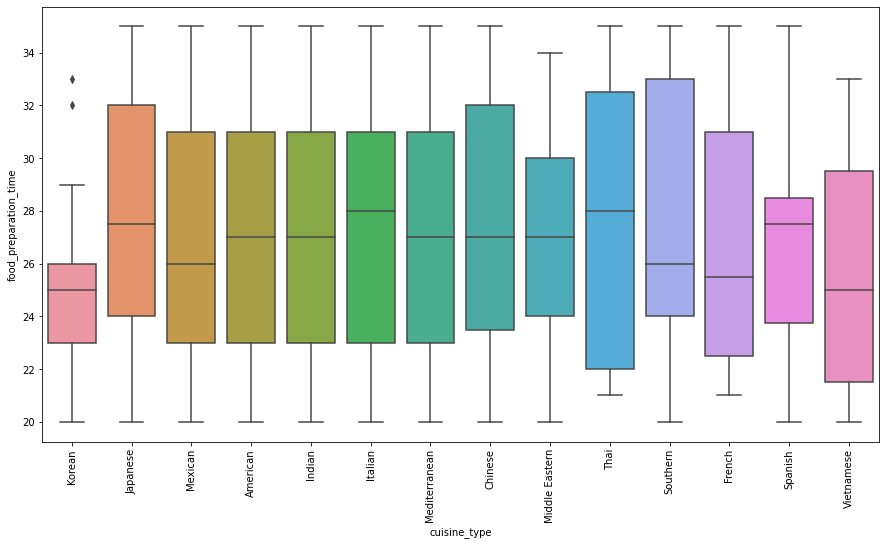

In [38]:
# Boxplot showing relationship between different cuisine types and food preparation time

plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);

### Observations

#### 1) Most cuisines take between 25-28 minutes to prepare

#### 2) Broadly there are not much systematic differences between type of cuisines and preparation time

#### 3) Korean and Vietnamese take the least amount of time to prepare (25 minutes) while Italian and Thai take the most (28 minutes)

### **Cuisine type vs food delivery time**

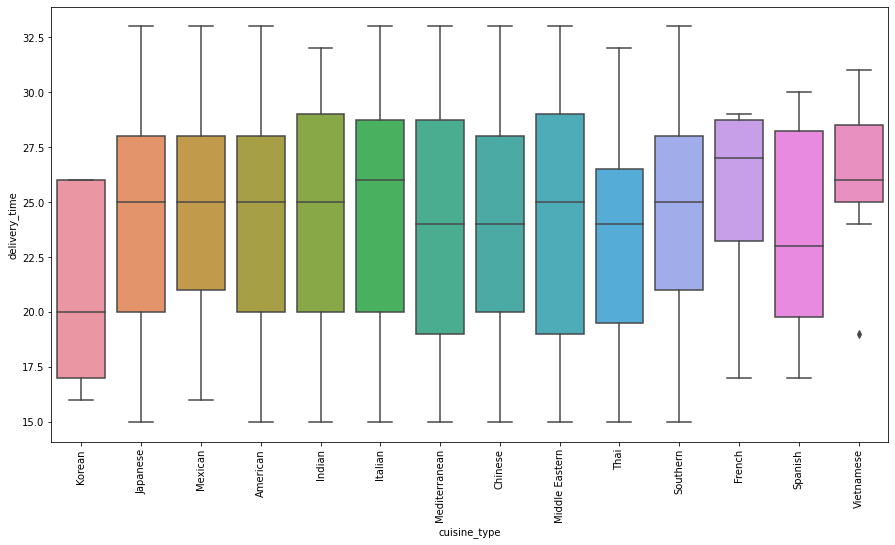

In [39]:
# Boxplot showing relationship between different cuisine types and food delivery time

plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=90);

### Observations

#### 1) Most cuisine types take 24-26 minutes to deliver

#### 2) There is mostly no relationship between cuisine type and delivery time

#### 3) Korean food only takes 20 minutes to deliver which is comparatively faster compared to most cuisines

### **Cuisine type vs Rating**

#### Approach: 
* It is clear from our univariate analyses of cuisine types that not all cuisine types have high demand 
* There is not a lot of data for a lot of cuisines
* We will concentrate on the six most popular cuisines to explore this relationship
* These are American, Japanese, Italian, Chinese, Mexican and Indian
* We will exclude data where no rating is given by customer

In [40]:
# Create a list of top 6 popular cuisines obtained from earlier observations
sel_cusine= ['American', 'Japanese', 'Italian', 'Chinese','Mexican','Indian']

# Create the list of ratings given by customers filtering data where no rating is given
num_rating =['3','4','5']

# Create a dataframe that includes only these six cuisine types and the above ratings
df_sel_cuisine =df[df['cuisine_type'].isin(sel_cusine) & df['rating'].isin(num_rating)]

# Show first five rows of dataframe
df_sel_cuisine.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26


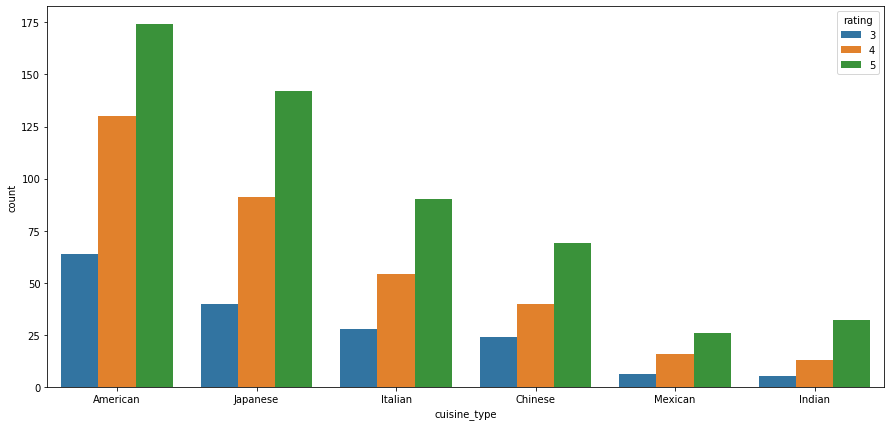

In [41]:
# Barplot showing ratings given to different cuisine types 
# Cuisine types are sorted in roughly decreasing popularity
# Ratings are arranged in increasing value

plt.figure(figsize = (15,7))
sns.countplot(data=df_sel_cuisine,x='cuisine_type', hue='rating',order=sel_cusine, hue_order=num_rating );

### Observations:

#### For customers who rate orders, most give 5 star ratings and the fewest give 3 star ratings 

#### This behavior is fairly uniform across different types of cuisines 

### **Cuisine type vs Day of the week**

### Approach: 
* We will use a similar approach to explore this relationship
* There is not a lot of data for most cuisines, so we will concentrate on the six most popular cuisines 
* These are American, Japanese, Italian, Chinese, Mexican and Indian
* We will however in this case also include data where customer has not rated 

In [42]:
# Create a dataframe that includes the six most popular cuisine types 
df_sel_cuisine_all_rating =df[df['cuisine_type'].isin(sel_cusine)]

# Show dataframe
df_sel_cuisine_all_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
...,...,...,...,...,...,...,...,...,...
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


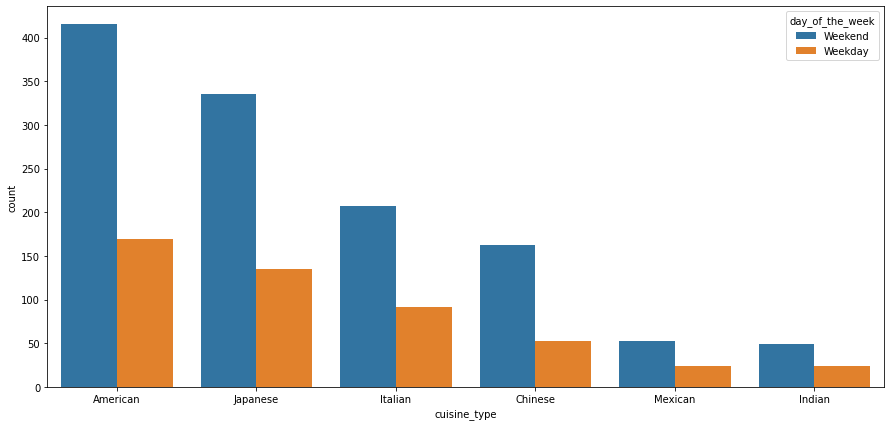

In [43]:
# Barplot showing demands to different cuisine types on weekday vs weekends
# Cuisine types are sorted in roughly decreasing popularity

plt.figure(figsize = (15,7))
sns.countplot(data=df_sel_cuisine_all_rating,x='cuisine_type', hue='day_of_the_week',order=sel_cusine);

### Observations:

#### Customer demand for food ordering is higher on weekends

#### This behavior is fairly uniform across different types of cuisines

### **Day of the week vs cost of order**

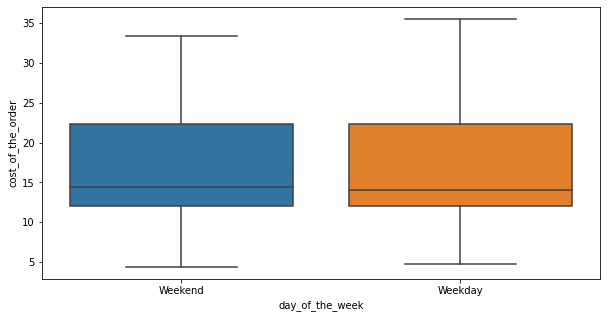

In [44]:
# Boxplot showing relationship between day of the week and cost of order

plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order');


### Observations

#### 1) Median food price ordered is around ~14 dollar both on Weekday and Weekend

#### 2)There is no relationship between the day of the order (Weekend/Weekday) and cost of order

### **Day of the week vs food preparation time**

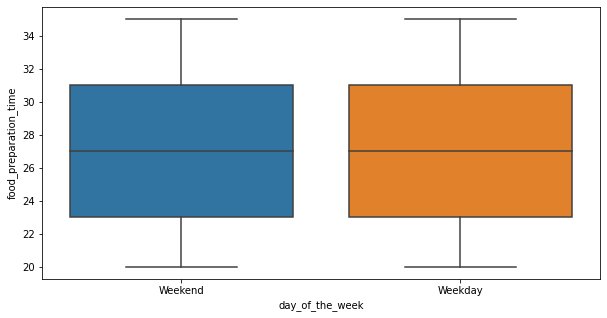

In [45]:
# Boxplot showing relationship between day of the week and food prep time

plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time');

### Observations

#### 1) Median food prep time is around ~27 minutes both on Weekday and Weekend

#### 2) There is no relationship between the day of the order (Weekend/Weekday) and food prep time

### **Day of the week vs food delivery time**

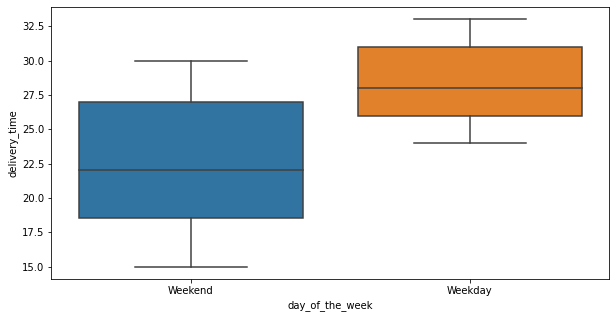

In [46]:
# Boxplot showing relationship between day of the week and food delivery time

plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time');

### Observations

#### 1) Median delivery time on weekend is 22 minutes

#### 2) Median delivery time on weekday is 28 minutes

#### 3) Weekend delivery time is approximately 6 minutes faster compared to weekdays

### **Customer rating vs cost of order**

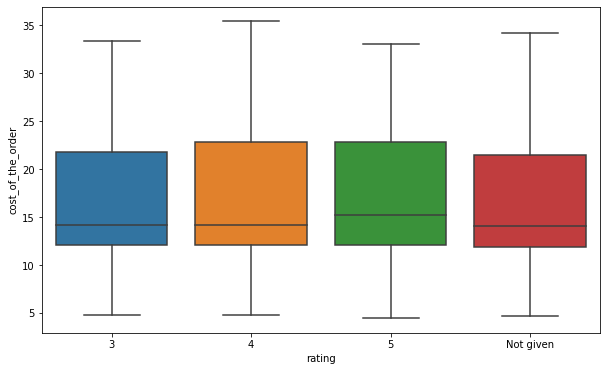

In [47]:
# Boxplot showing relationship between customer rating and cost of the order

plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='rating', y='cost_of_the_order', order=rating_list);


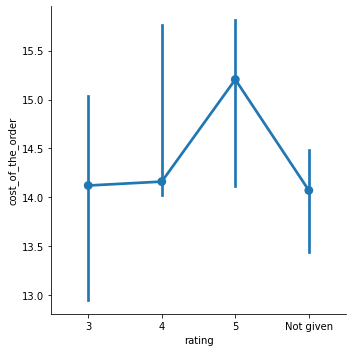

In [48]:
# Pointplot showing relationship between rating and cost of the order 

sns.catplot(data=df, x='rating', y='cost_of_the_order', kind='point', order=rating_list, estimator=np.median);


### **Customer rating vs food prep time**

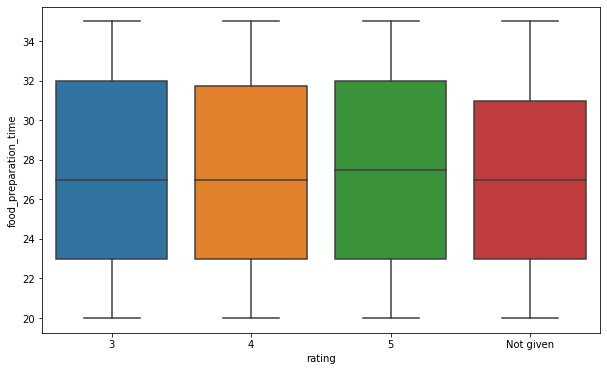

In [49]:
# Boxplot showing relationship between customer rating and food prep time

plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='rating', y='food_preparation_time',order=rating_list);


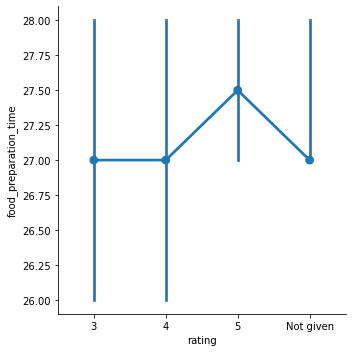

In [50]:
# Pointplot showing relationship between rating and food prep time 

sns.catplot(data=df, x='rating', y='food_preparation_time', kind='point', order=rating_list, estimator=np.median);


### **Customer rating vs food delivery time**

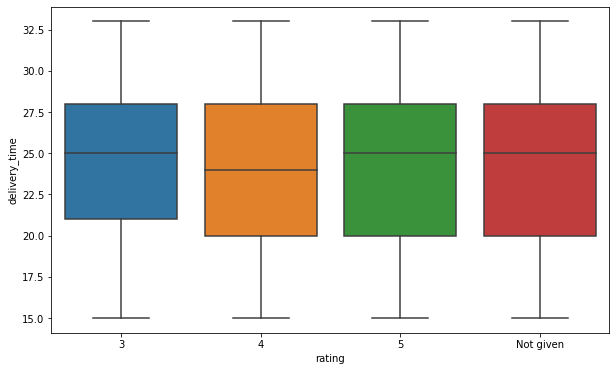

In [51]:
# Boxplot showing relationship between customer rating and food delivery time

plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='rating', y='delivery_time',order=rating_list);

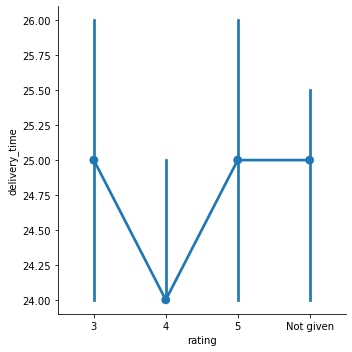

In [52]:
# Pointplot showing relationship between rating and delivery time

sns.catplot(data=df, x='rating', y='delivery_time', kind='point', order=rating_list, estimator=np.median);


### Observations:

#### There is broadly no relationship between customer rating and cost of the order, food preparation time and food delivery time

#### 5 rating is given to food order costing 1-1.5 dollar more in median price compared to the other ratings

#### Higher ratings do not correspond to either shorter food preparation time or shorter delivery time

#### Customers who do not leave ratings also have similar cost of order, food prep and delivery time

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [53]:
# Filtering data for only orders that has customer ratings

df_new_rating=df.loc[df['rating']!='Not given'].copy()

# Display
df_new_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [54]:
# Rating data is converted into a integer from string
df_new_rating['rating'] =df_new_rating['rating'].astype(int)

# Display summary of dataframe. Rating column is now type int
df_new_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [55]:
# Total no of ratings recieved by every restaurant is calculated 
df_res_rating = df_new_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# Rating column is renamed as rating count
df_res_rating.rename(columns = {'rating':'rating_count'}, inplace = True)

# Display
df_res_rating

,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [56]:
# Restaurant names that have more than 50 ratings are obtained
res_names =df_res_rating[df_res_rating['rating_count']>50].restaurant_name

# Display
res_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [57]:
# Data for restaurants with more than 50 ratings is filtered
df_final=df_new_rating[df_new_rating['restaurant_name'].isin(res_names)].copy()

# Display
df_final

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [58]:
# Restaurants are grouped by name and mean ratings for each restaurant is calculated
df_final.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

#Since all restaurants have >4 rating, an additional slice to get restaurants with mean rating>4 is not needed

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### Observations:

#### 1) There are four restaurants with more than 50 ratings and average ratings>4.

#### 2) They are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi

#### 3) Their average ratings range from 4.21 to 4.51



###  The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [59]:
# Function that computes net revenue for the company based on cost of order

def net_revenue(x):
  if(x>20):
    return x*0.25
  elif(x>5):
    return x*0.15
  else:
    return x*0

In [60]:
# Function is applied to all rows of the dataframe to calculate company revenue
df['Revenue']=df['cost_of_the_order'].apply(net_revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [61]:
# Cumulative total revenue from all the orders
total_net_revenue=round(df['Revenue'].sum(),2)

print("The total net revenue for Foodhub across all orders is",total_net_revenue, "dollars")

The total net revenue for Foodhub across all orders is 6166.3 dollars


### Observations: 

#### The net revenue for Foodhub across all orders is $6166.3


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [62]:
#Total delivery time is computed by adding delivery time with food preparation time
df['total_time']=df['delivery_time']+df['food_preparation_time']

#No of orders that takes more than 60 minutes is computed
sixty_plus=df.loc[df['total_time']>60].shape[0]

# Percentage of orders taking more than 60 minutes is calculated rounded to 1 decimal
percent_sixty_plus=round((sixty_plus/df.shape[0])*100,1)

# Percentage is printed
print("The percentage of orders taking more than 60 minutes to deliver is", percent_sixty_plus, "%")

The percentage of orders taking more than 60 minutes to deliver is 10.5 %


### Observations: 

#### **10.5%** of all orders takes more than 60 minutes to deliver


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [63]:
# Average delivery time on weekday is computed
weekday_mean_del_time=round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(),2)

#Average delivery time on weekend is computed
weekend_mean_del_time=round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(),2)

#Av delivery time on weekday and weekend is printed
print("The mean delivery time on weekdays is",weekday_mean_del_time,"minutes and on weekends is",weekend_mean_del_time, "minutes" )

The mean delivery time on weekdays is 28.34 minutes and on weekends is 22.47 minutes


### Observations: 

#### 1) Mean delivery time on weekdays is 28.34 minutes while on weekends it is 22.47 minutes. 

#### 2) Weekday delivery is nearly 6 minutes slower on average compared to weekends


## **Conclusions:**

- Foodhub has served **1200** customers to place order to **178** unique restaurants serving **14** different types of cuisines 

- Foodhub has processed and delivered a total of **1898** customer orders

- **American** cuisine is the most popular type of cuisine making up 30% of all customer orders

- Top 4 popular cuisines: American, Japanese, Italian and Chinese make up 83% of all customer orders

-  Customers order nearly **2.5 X** times more during weekends compared to weekdays

- Nearly 40% of all customers leave no rating on the app

- Of the remaining customers who rate, 50% leave a five star rating and the rest 3 and 4 ratings

- Median cost to order food is around 14 dollars. Only 30% of orders cost more than 20 dollars

- It takes about a median time of 27 minutes to prepare and 25 minutes to deliver food

- On weekends, Delivery time is 6 minutes faster compared to weekdays

- Foodhub has generated around 6200 dollars across all orders from fixed percentages of order costs

- Only four restaurants out of 178 have an average of 4+ rating and have more than 50 customer ratings

## **Recommendations**:

 **[1]**  Customers tend to order significantly more during weekends compared to weekdays. While Foodhub is already serving customers well by providing faster delivery on weekends, it may be helped by likely lesser traffic on weekends. Because of increasing demand on weekends, customer experience may be improved by increasing fleet size on weekends to serve more customers as well as provide even faster delivery times

 **[2]**  Given the lack of correlation between customer ratings and total delivery times, a slightly slower delivery time may not affect customer ratings. Lower fleet sizes on weekdays may make more sense given the lower demand on weekdays which can help lower company costs.

 **[3]**  Alternatively, the company can also try to increase demand on weekdays by providing more customer discounts that might boost orders

 **[4]**  Customer ratings are crucial to gauge customer feedback on Foodhub's service. One area where Foodhub could improve is to incentivize customers to provide more ratings. More customer feedback data through ratings can help better understand customer behavior and preferences such as cuisine types, favorite restaurants, favorite time to ordewr etc.

 **[5]** Small discount vouchers on next orders could be offered to customers if they leave ratings which will not only get Foodhub more data about customer opinion but also increase Foodhub's revenue.

 **[6]**  Current revenue model is 15% on orders greater than 5 dollars and 25% on orders greater than 20 dollars. EDA suggests that only 30% of orders are greater than 20 dollars. Median cost of order is around 14 dollars. This suggests most common orders (14-16 dollars) generate the same percent revenue as much cheaper orders (<$10). Foodhub could increase their revenue by proposing a more tiered model to restaurants e.g. 15% on order between 5-10 dollars, 20% on orders between 10-20 dollars and 25% on orders> 20 dollars.

 **[7]**  Because there is significantly higher demand on weekends, it might also be useful to have a have a 5-10% increase in charges to restaurants during weekends. This will significantly boost revenue

 **[8]**  The company could also promote restaurants serving more popular cuisines that have high customer ratings (e.g. >4-4.5) but have recieved fewer number of orders. Better outreach may help them reach more customers. Customers could also be incenticized to order from such restaurants at discounted rates. 

---